# Marketing Ad Campaigns ROI

## In order to implement and validate the methodologies used in the analysis, a Python script was written to generate synthetic, yet realistic, data to run queries against. This allowed for the analysis of results and the creation of visualizations to validate various calculations and methodologies. The generated synthetic data adheres to the provided data schemas for the `customers`, `ad_views`, `campaigns`, and `invoices` tables, and has been calibrated to reflect plausible real-world values.

### Generated Data Overview:

**Customers:**
- 2000 customers were generated for the analysis.

**Ad Views:**
- A total of 20,000 ad_views were synthesized.
- The data reflects a ~5% click-through rate.
- Ad_views and clicks are constrained to occur only between the `start_time` and `end_time` of their respective campaigns.

**Campaigns:**
- 10 different campaigns are included in the data.
- The durations of these campaigns range between 1 and 10 days.
- The cost per impression varies from approximately $0.005 to $0.050, corresponding to a CPM of $1-$50.

**Invoices:**
- 20 invoices have been generated.
- About 90% of these invoices have a ‘paid’ status.
- The amounts due on these invoices range between $5 and $50.


In [1]:
import pandas as pd
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()

# 1. Generate Customers Data
customers_list = []
for _ in range(2000):
    customers_list.append([fake.unique.random_number(), fake.first_name(), fake.last_name(), fake.company(), fake.date_time_this_year()])

customers_df = pd.DataFrame(customers_list, columns=['id', 'first_name', 'last_name', 'company_name', 'created_time'])

# 2. Generate Campaigns Data
campaigns_list = []
for _ in range(10):
    start_time = fake.date_time_this_year()
    end_time = start_time + timedelta(days=random.randint(1,10))
    campaigns_list.append([fake.unique.random_number(), fake.random_number(digits=3)/10000/2, start_time, end_time])

campaigns_df = pd.DataFrame(campaigns_list, columns=['id', 'cost_per_impression', 'start_time', 'end_time'])

# 3. Generate Ad_Views Data
ad_views_list = []
channels = ["google_search", "reddit", "facebook", "youtube"]

for _ in range(20000):
    campaign_id = random.choice(campaigns_df['id'].tolist())
    campaign_row = campaigns_df.loc[campaigns_df['id'] == campaign_id]
    campaign_start_time = campaign_row['start_time'].iloc[0]
    campaign_end_time = campaign_row['end_time'].iloc[0]

    # Filter the customers DataFrame to get only the customers that were created before the end of the campaign
    valid_customers_df = customers_df[customers_df['created_time'] < campaign_end_time]

    # Select a valid customer and generate ad_views data
    customer_id = random.choice(valid_customers_df['id'].tolist())
    customer_created_time = valid_customers_df.loc[valid_customers_df['id'] == customer_id, 'created_time'].iloc[0]

    viewed_time = fake.date_time_between_dates(datetime_start=max(customer_created_time, campaign_start_time), datetime_end=campaign_end_time)
    
    # 5% clickthrough rate
    if random.random() <= 0.05:
        clickthrough_time = fake.date_time_between_dates(datetime_start=viewed_time, datetime_end=campaign_end_time)
    else:
        clickthrough_time = None
    
    ad_views_list.append([fake.unique.random_number(), customer_id, fake.catch_phrase(), random.choice(channels), viewed_time, clickthrough_time, campaign_id])

ad_views_df = pd.DataFrame(ad_views_list, columns=['id', 'customer_id', 'creative', 'channel', 'viewed_time', 'clickthrough_time', 'campaign_id'])

# 4. Generate Invoices Data
invoices_list = []
statuses = ["active", "overdue", "void", "write_off"]  # Remove 'paid' from here as we will handle it separately
clickthrough_ad_views_df = ad_views_df.dropna(subset=['clickthrough_time'])

for _ in range(20):
    row = clickthrough_ad_views_df.sample(1).iloc[0]
    customer_id = row['customer_id']
    clickthrough_time = row['clickthrough_time']
    # Generating created_time that is after clickthrough_time and within a reasonable range.
    created_time = fake.date_time_between_dates(datetime_start=clickthrough_time, datetime_end=clickthrough_time + timedelta(days=2))

    # Generating due_date that is after created_time and within a reasonable range.
    due_date = fake.date_time_between_dates(datetime_start=created_time, datetime_end=created_time + timedelta(days=30))
    
    # 90% chance of being 'paid', 10% chance of being one of the other statuses
    if random.random() <= 0.90:
        status = 'paid'
    else:
        status = random.choice(statuses)
    
    invoices_list.append([fake.unique.random_number(), customer_id, fake.random_number(digits=2)/2, due_date, created_time, status])

invoices_df = pd.DataFrame(invoices_list, columns=['id', 'customer_id', 'amount_due', 'due_date', 'created_time', 'status'])

## Generated Tables ##

In [2]:
customers_df

,id,first_name,last_name,company_name,created_time
0,847638712,Janice,Martin,"Mitchell, Ellis and Cross",2023-02-19 13:56:55
1,841,Catherine,Schmidt,Chapman-King,2023-04-27 20:13:16
2,47681,Kaitlyn,Aguilar,Salas and Sons,2023-04-01 00:27:50
3,9900496,Alexander,Mitchell,Lee-Chambers,2023-05-18 07:22:49
4,42408411,Jessica,Lewis,Vincent-Campbell,2023-05-28 10:35:34
...,...,...,...,...,...
1995,241330,Mckenzie,Harding,Miller-Strickland,2023-04-16 07:29:15
1996,331,Kenneth,Nelson,Sanford-Randolph,2023-07-27 07:18:04
1997,85,Debbie,Gonzalez,"Bates, Trevino and Grant",2023-01-18 18:27:55
1998,2652531,Jennifer,Baker,Mcpherson Group,2023-03-31 22:41:59


In [3]:
ad_views_df

,id,customer_id,creative,channel,viewed_time,clickthrough_time,campaign_id
0,13437,5290168,User-centric foreground instruction set,google_search,2023-08-22 20:21:19,NaT,9606
1,48886698,3320134,Optional 5thgeneration artificial intelligence,youtube,2023-08-27 02:27:12,NaT,9606
2,311603,457,Compatible radical task-force,facebook,2023-03-19 02:23:42,NaT,229011505
3,3681738,4606,Public-key global core,google_search,2023-09-01 18:22:16,NaT,171899884
4,1293,2120,Optimized local architecture,reddit,2023-01-19 06:23:01,NaT,3540
...,...,...,...,...,...,...,...
19995,415936,7134504,Optional bottom-line benchmark,facebook,2023-09-13 17:23:42,NaT,50250619
19996,57068733,918799,Cross-platform 3rdgeneration circuit,facebook,2023-01-30 02:16:09,NaT,7115
19997,81386605,6315,Phased contextually-based methodology,youtube,2023-08-24 22:58:58,NaT,9606
19998,96324,5944,Diverse bi-directional implementation,youtube,2023-08-24 20:15:17,NaT,9606


In [4]:
campaigns_df

,id,cost_per_impression,start_time,end_time
0,50250619,0.00470,2023-09-13 16:43:04,2023-09-14 16:43:04
1,9606,0.04135,2023-08-18 13:49:51,2023-08-27 13:49:51
2,9218,0.03730,2023-08-20 21:50:57,2023-08-25 21:50:57
3,171899884,0.00700,2023-08-28 14:27:06,2023-09-05 14:27:06
4,7115,0.01260,2023-01-25 23:16:14,2023-02-03 23:16:14
5,229011505,0.03830,2023-03-16 15:04:20,2023-03-20 15:04:20
6,2129619,0.00090,2023-07-05 01:51:01,2023-07-08 01:51:01
7,3540,0.02335,2023-01-18 03:47:25,2023-01-22 03:47:25
8,3570,0.03545,2023-06-07 13:05:38,2023-06-09 13:05:38
9,928,0.04255,2023-01-24 07:29:36,2023-01-29 07:29:36


In [5]:
invoices_df

,id,customer_id,amount_due,due_date,created_time,status
0,3840,27844052,23.5,2023-09-07 04:52:19,2023-09-05 03:05:15,paid
1,9770,118529,45.0,2023-09-19 09:39:46,2023-09-06 02:23:12,paid
2,749575271,7491,40.0,2023-09-10 16:30:06,2023-08-26 03:54:59,paid
3,809234994,702974965,16.5,2023-07-22 23:52:40,2023-07-09 20:40:36,paid
4,81943,953,20.5,2023-02-22 08:55:57,2023-02-04 21:31:17,paid
5,7216416,77782941,35.0,2023-02-17 07:27:08,2023-02-02 17:17:47,paid
6,56358703,68143,48.0,2023-09-13 08:51:19,2023-08-23 19:26:38,paid
7,965451986,30938885,23.5,2023-02-07 13:11:24,2023-02-02 17:22:17,paid
8,3028251,5164,48.0,2023-02-10 05:23:26,2023-01-28 14:34:46,paid
9,86045,883920544,27.0,2023-07-17 15:14:00,2023-07-08 20:40:48,paid


In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [7]:
conn = sqlite3.connect(':memory:')

In [8]:
customers_df.to_sql('customers', conn, index=False, if_exists='replace')
campaigns_df.to_sql('campaigns', conn, index=False, if_exists='replace')
ad_views_df.to_sql('ad_views', conn, index=False, if_exists='replace')
invoices_df.to_sql('invoices', conn, index=False, if_exists='replace')


20

## 1. Describe how to calculate the average campaign conversion rate on ad click-throughs that would allow you to break even on marketing spend? ##

### In order to calculate the breakeven CVR using the formula derived in the main document, we query for the required intermediary metrics - CPI, Avg(amount_due), and CTR - from the table and use those values to calculate the breakeven CVR for each campaign ###

In [9]:
# Step 1: Calculate the average amount_due and store it in a Python variable.
avg_amount_due_query = "SELECT AVG(amount_due) as avg_amount_due FROM invoices;"
avg_amount_due_df = pd.read_sql_query(avg_amount_due_query, conn)
avg_amount_due = avg_amount_due_df.loc[0, 'avg_amount_due']

# Step 2: Fetch campaign-wise information excluding average amount due and breakeven_cvr
campaign_info_query = """
SELECT 
  c.id as campaign_id, 
  c.cost_per_impression,
  (COUNT(CASE WHEN av.clickthrough_time IS NOT NULL THEN 1 ELSE NULL END) * 1.0 / COUNT(*)) as clickthrough_rate
FROM campaigns c
LEFT JOIN ad_views av ON c.id = av.campaign_id
GROUP BY c.id, c.cost_per_impression;
"""
campaign_info_df = pd.read_sql_query(campaign_info_query, conn)

# Step 3: Add the average amount due to the DataFrame and calculate breakeven_cvr in Python.
campaign_info_df['average_amount_due'] = avg_amount_due
campaign_info_df['breakeven_cvr'] = campaign_info_df['cost_per_impression'] / (campaign_info_df['average_amount_due'] * campaign_info_df['clickthrough_rate'])

# Round the final DataFrame
campaign_info_df['cost_per_impression'] = campaign_info_df['cost_per_impression'].round(3)
campaign_info_df['clickthrough_rate'] = campaign_info_df['clickthrough_rate'].round(3)
campaign_info_df['average_amount_due'] = campaign_info_df['average_amount_due'].round(2)
campaign_info_df['breakeven_cvr'] = campaign_info_df['breakeven_cvr'].round(3)

# Display the final DataFrame.
campaign_info_df


,campaign_id,cost_per_impression,clickthrough_rate,average_amount_due,breakeven_cvr
0,928,0.043,0.054,28.18,0.028
1,3540,0.023,0.051,28.18,0.016
2,3570,0.035,0.045,28.18,0.028
3,7115,0.013,0.048,28.18,0.009
4,9218,0.037,0.059,28.18,0.022
5,9606,0.041,0.047,28.18,0.031
6,2129619,0.001,0.057,28.18,0.001
7,50250619,0.005,0.040,28.18,0.004
8,171899884,0.007,0.055,28.18,0.005
9,229011505,0.038,0.057,28.18,0.024


## 2. How would you visualize this data to track campaign performance over time? ##

### We can query for the metrics outlined in the main document using their respective methodologies and then visualize them here in Python ###

#### a. CTR by Campaign by looking at % of rows in ad_views with non-null values for clickthrough_time ####

In [10]:
# Write the SQL query to fetch clickthrough_rate per campaign per day
clickthrough_rate_query = """
SELECT 
    av.campaign_id,
    DATE(av.viewed_time) as view_date, 
    (COUNT(CASE WHEN av.clickthrough_time IS NOT NULL THEN 1 ELSE NULL END) * 1.0 / COUNT(*)) as clickthrough_rate
FROM ad_views av
GROUP BY av.campaign_id, DATE(av.viewed_time)
ORDER BY DATE(av.viewed_time);
"""

# Execute the SQL query and store the result in a DataFrame
clickthrough_rate_df = pd.read_sql_query(clickthrough_rate_query, conn)

C:\Users\bruce\AppData\Local\Temp\ipykernel_23252\3961582911.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')  # or any other color map


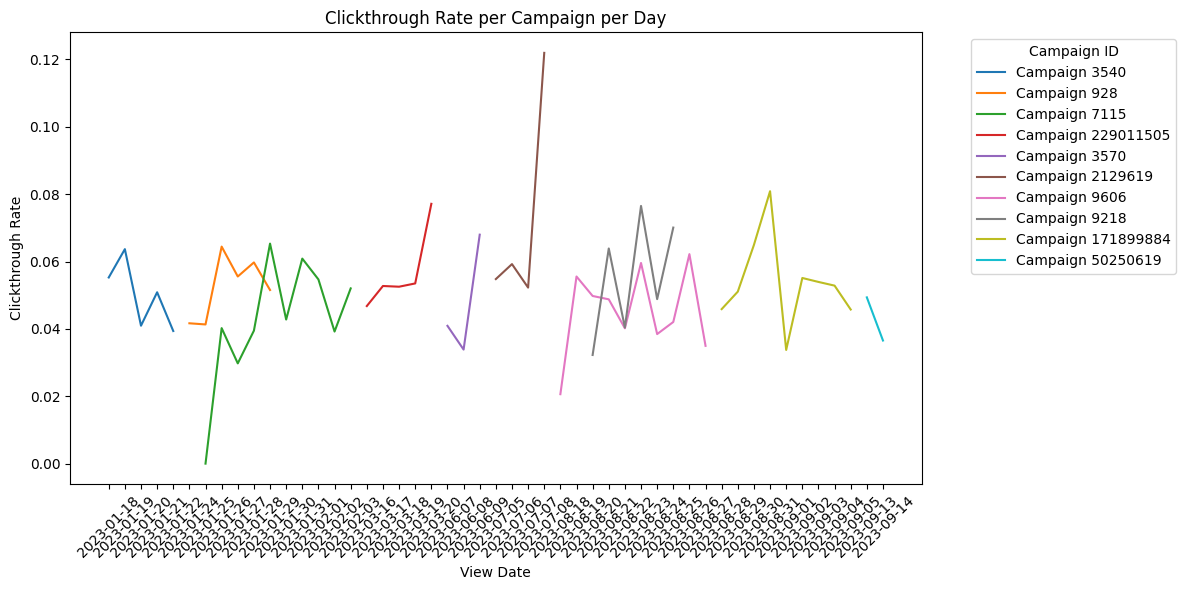

In [11]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Get a color map
cmap = cm.get_cmap('tab10')  # or any other color map

# Get unique campaign_ids
campaign_ids = clickthrough_rate_df['campaign_id'].unique()

# Loop over unique campaign_ids and plot each one
for i, campaign_id in enumerate(campaign_ids):
    # Filter the DataFrame for each campaign_id
    df_filtered = clickthrough_rate_df[clickthrough_rate_df['campaign_id'] == campaign_id]
    
    # Sort values by 'view_date' just in case they are out of order
    df_filtered = df_filtered.sort_values(by='view_date')
    
    # Plotting each campaign_id with a unique color from the color map
    plt.plot(df_filtered['view_date'], df_filtered['clickthrough_rate'], 
             label=f'Campaign {campaign_id}', color=cmap(i % 10))  # i % 10 ensures color does not go out of bounds

# Adjust plot for better readability
plt.title('Clickthrough Rate per Campaign per Day')
plt.xlabel('View Date')
plt.ylabel('Clickthrough Rate')
plt.legend(title='Campaign ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


#### b. Average Invoice Size by looking at avg(amount_due) in the invoices table ####

In [12]:
# Write the SQL query to fetch clickthrough_rate per campaign per day
avg_amount_due_query = """
SELECT 
    DATE(iv.created_time) as created_date, 
    AVG(iv.amount_due) as average_amount_due
FROM invoices iv
GROUP BY DATE(iv.created_time)
ORDER BY DATE(iv.created_time);
"""

# Execute the SQL query and store the result in a DataFrame
avg_amount_due_query_df = pd.read_sql_query(avg_amount_due_query, conn)

C:\Users\bruce\AppData\Local\Temp\ipykernel_23252\1319485836.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')  # or any other color map


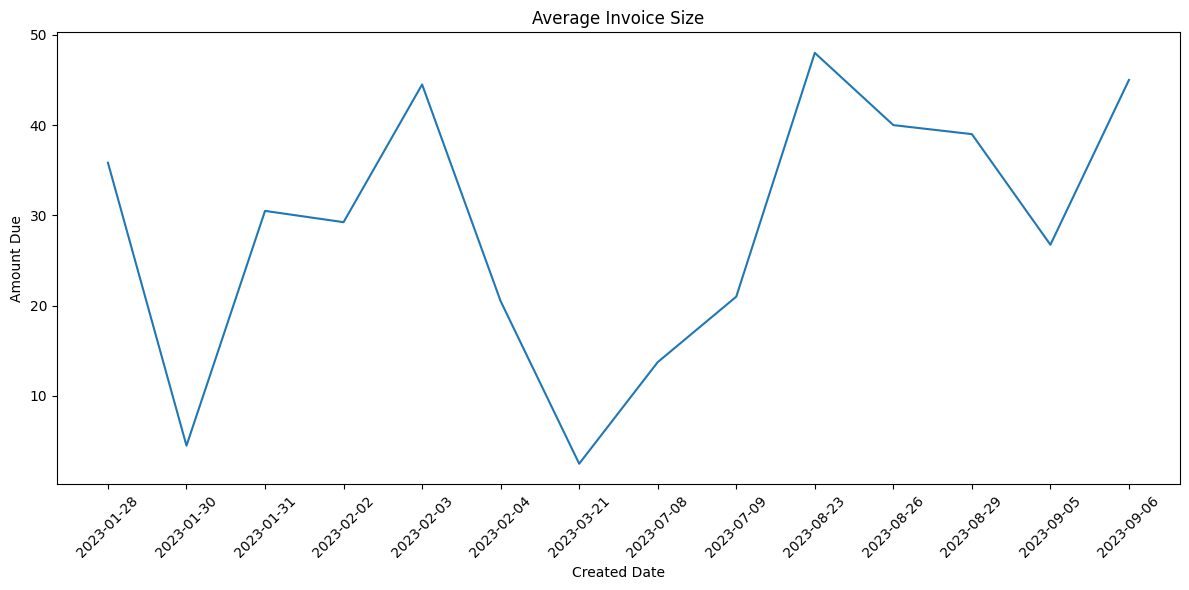

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Get a color map
cmap = cm.get_cmap('tab10')  # or any other color map

# Plotting average_amount_due with a unique color from the color map
plt.plot(avg_amount_due_query_df['created_date'], avg_amount_due_query_df['average_amount_due'], color=cmap(0))  

# Adjust plot for better readability
plt.title('Average Invoice Size')
plt.xlabel('Created Date')
plt.ylabel('Amount Due')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

#### c. Overall CVR by counting total invoices generated per week divided by total number of clicks per week ####

In [14]:
conversion_rate_query = """
SELECT 
    COALESCE(STRFTIME('%Y-%W', a.clicked_date), STRFTIME('%Y-%W', i.created_date)) as event_week,
    COALESCE(i.total_invoices, 0) * 1.0 / COALESCE(a.total_clicks, 0) as conversion_rate
FROM 
    (SELECT DATE(viewed_time) as clicked_date, COUNT(*) as total_clicks FROM ad_views WHERE clickthrough_time IS NOT NULL GROUP BY STRFTIME('%Y-%W', DATE(viewed_time))) a
FULL OUTER JOIN 
    (SELECT DATE(created_time) as created_date, COUNT(*) as total_invoices FROM invoices GROUP BY STRFTIME('%Y-%W', DATE(created_time))) i
ON STRFTIME('%Y-%W', a.clicked_date) = STRFTIME('%Y-%W', i.created_date)
ORDER BY event_week;
"""

# Execute the SQL query and store the result in a DataFrame
conversion_rate_query_df = pd.read_sql_query(conversion_rate_query, conn)


C:\Users\bruce\AppData\Local\Temp\ipykernel_23252\4040028437.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


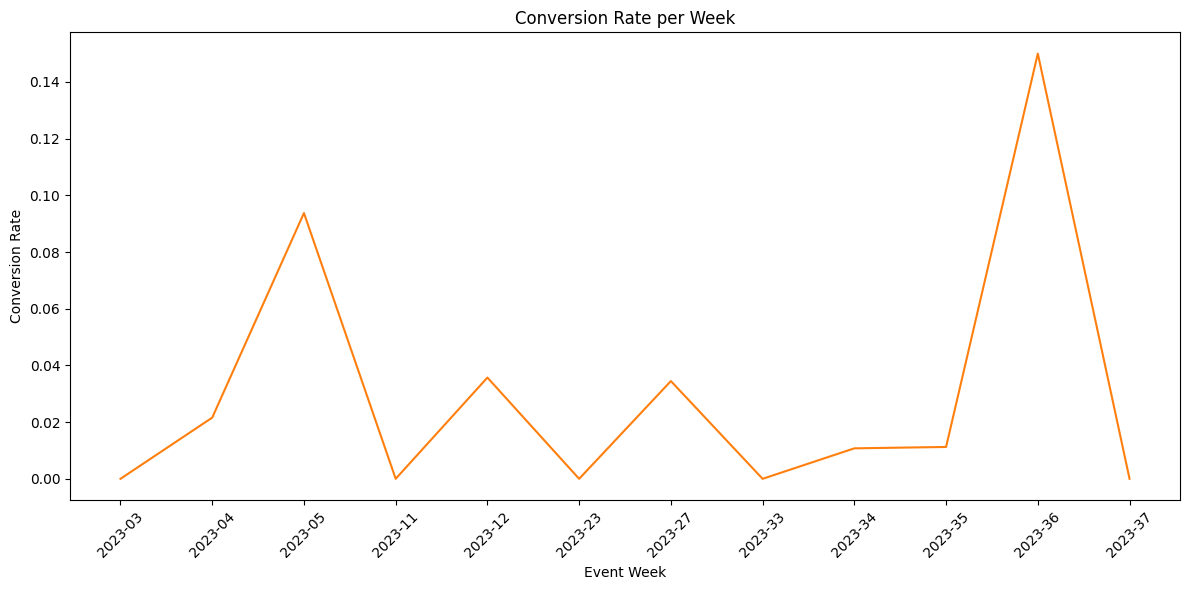

In [15]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Get a color map
cmap = cm.get_cmap('tab10')

# Sort values by 'event_week' just in case they are out of order
conversion_rate_query_df = conversion_rate_query_df.sort_values(by='event_week')

# Plotting conversion_rate with a unique color from the color map
plt.plot(conversion_rate_query_df['event_week'], conversion_rate_query_df['conversion_rate'], color=cmap(1))

# Adjust plot for better readability
plt.title('Conversion Rate per Week')
plt.xlabel('Event Week')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


#### d. Total Cost by summing up the cost_per_impression for each impression in the ad_views table and Total Revenue by summing up the amount_due in the invoices table ####

In [16]:
total_cost_query = """
SELECT 
    STRFTIME('%Y-%W', av.viewed_time) as viewed_week,
    SUM(c.cost_per_impression) as total_cost
FROM campaigns c
LEFT JOIN ad_views av ON c.id = av.campaign_id
GROUP BY STRFTIME('%Y-%W', av.viewed_time)
ORDER BY STRFTIME('%Y-%W', av.viewed_time);
"""


# Execute the SQL query and store the result in a DataFrame
total_cost_df = pd.read_sql_query(total_cost_query, conn)


In [17]:
total_revenue_query = """
SELECT 
    STRFTIME('%Y-%W', created_time) as created_week,
    SUM(amount_due) as total_revenue
FROM invoices
GROUP BY created_week
ORDER BY created_week;
"""

# Execute the SQL query and store the result in a DataFrame
total_revenue_df = pd.read_sql_query(total_revenue_query, conn)


C:\Users\bruce\AppData\Local\Temp\ipykernel_23252\1790516742.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


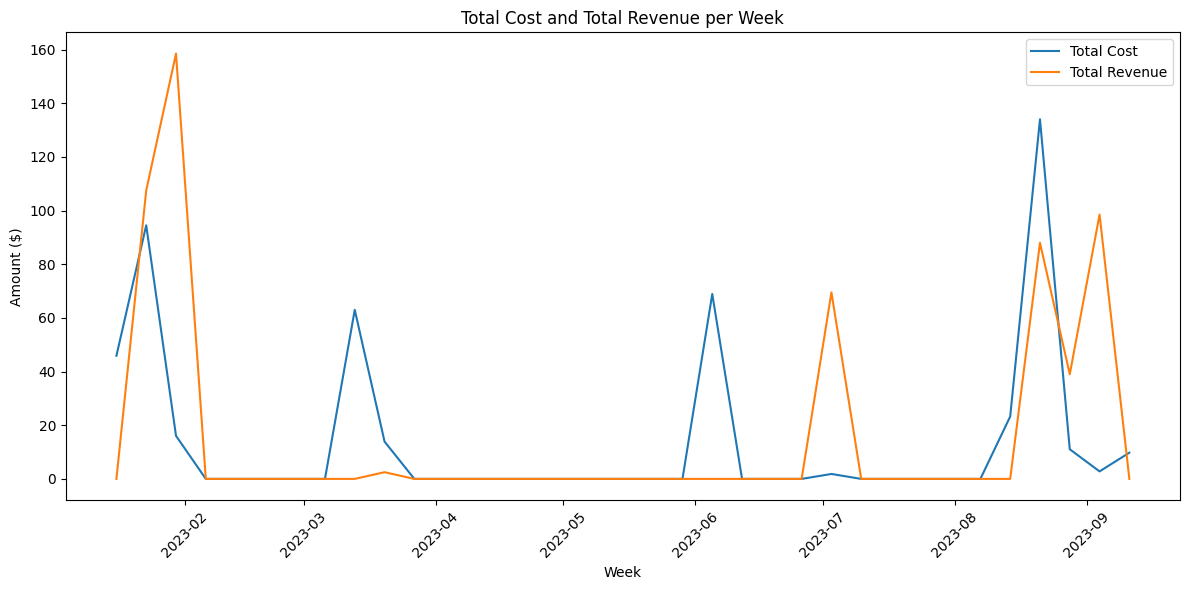

In [18]:
# Merge the two DataFrames on the week columns
merged_df = pd.merge(total_cost_df.rename(columns={'viewed_week': 'week'}), 
                     total_revenue_df.rename(columns={'created_week': 'week'}), 
                     on='week', 
                     how='outer')

# Convert the 'week' column to datetime
merged_df['week'] = merged_df['week'].apply(lambda x: datetime.strptime(x + '-1', "%Y-%W-%w"))

# Find the min and max week in the merged_df
min_week = merged_df['week'].min()
max_week = merged_df['week'].max()

# Create a complete date range between min and max week with a weekly frequency
all_weeks = pd.date_range(start=min_week, end=max_week, freq='W-MON')

# Create a DataFrame with a complete date range between min and max week
all_weeks_df = pd.DataFrame(all_weeks, columns=['week'])

# Perform an outer merge between the all_weeks_df and merged_df
final_df = pd.merge(all_weeks_df, merged_df, on='week', how='left')

# Fill missing values with 0
final_df[['total_cost', 'total_revenue']] = final_df[['total_cost', 'total_revenue']].fillna(0)

# Now, plot the graph with weekly data.
plt.figure(figsize=(12, 6))
cmap = cm.get_cmap('tab10')

plt.plot(final_df['week'], final_df['total_cost'], label='Total Cost', color=cmap(0))
plt.plot(final_df['week'], final_df['total_revenue'], label='Total Revenue', color=cmap(1))

plt.title('Total Cost and Total Revenue per Week')
plt.xlabel('Week')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##  3. What other metrics would give you insight into the problem? How would you calculate them? (Bonus points if you can provide formulas or pseudocode) ##

### We can query for the metrics outlined in the main document using their respective methodologies ###

#### a. CTR per campaign among most valuable users by selecting the top 100 highest spenders and analyzing the CTRs on the campaigns they engaged with ####

In [19]:
clickthrough_rates_top_spenders = """
WITH HighSpenders AS (
    SELECT 
        i.customer_id,
        SUM(i.amount_due) AS total_spend
    FROM invoices i
    GROUP BY i.customer_id
    ORDER BY total_spend DESC
    LIMIT 100 -- adjusted to get the top 100 high spenders
)

SELECT 
    av.campaign_id,
    (COUNT(CASE WHEN av.clickthrough_time IS NOT NULL THEN 1 ELSE NULL END) * 1.0 / COUNT(*)) as clickthrough_rate
FROM ad_views av
JOIN HighSpenders hs ON av.customer_id = hs.customer_id
GROUP BY av.campaign_id
ORDER BY clickthrough_rate DESC;
"""

# Execute the SQL query and store the result in a DataFrame
clickthrough_rates_top_spenders_df = pd.read_sql_query(clickthrough_rates_top_spenders, conn)


In [20]:
clickthrough_rates_top_spenders_df['clickthrough_rate'] = clickthrough_rates_top_spenders_df['clickthrough_rate'].round(3)

clickthrough_rates_top_spenders_df

,campaign_id,clickthrough_rate
0,171899884,0.160
1,9606,0.160
2,2129619,0.158
3,7115,0.107
4,50250619,0.095
5,9218,0.091
6,3570,0.071
7,3540,0.059
8,229011505,0.056
9,928,0.055


#### b. CTR per campaign among most new users by selecting the users created in the most recent month and analyzing the CTRs on the campaigns they engaged with ####

In [21]:
clickthrough_rates_new_users = """
WITH NewestCohortMonth AS (
    SELECT 
        STRFTIME('%Y-%m', created_time) AS cohort_month
    FROM customers
    GROUP BY cohort_month
    ORDER BY cohort_month DESC
    LIMIT 1
)

, NewestCohort AS (
    SELECT id as customer_id
    FROM customers
    WHERE STRFTIME('%Y-%m', created_time) = (SELECT cohort_month FROM NewestCohortMonth)
)

SELECT 
    av.campaign_id,
    (COUNT(CASE WHEN av.clickthrough_time IS NOT NULL THEN 1 ELSE NULL END) * 1.0 / COUNT(*)) as clickthrough_rate
FROM ad_views av
JOIN NewestCohort nc ON av.customer_id = nc.customer_id
GROUP BY av.campaign_id
ORDER BY clickthrough_rate DESC;
"""

# Execute the SQL query and store the result in a DataFrame
clickthrough_rates_new_users_df = pd.read_sql_query(clickthrough_rates_new_users, conn)


In [22]:
clickthrough_rates_new_users_df['clickthrough_rate'] = clickthrough_rates_new_users_df['clickthrough_rate'].round(3)

clickthrough_rates_new_users_df

,campaign_id,clickthrough_rate
0,171899884,0.037
1,50250619,0.018


#### c. New Users with highest potential by analyzing the users created in the most recent month and looking at each of their CTRs ####

In [23]:
top_new_users_by_clickthrough = """
WITH NewestCohortMonth AS (
    SELECT 
        STRFTIME('%Y-%m', created_time) AS cohort_month
    FROM customers
    GROUP BY cohort_month
    ORDER BY cohort_month DESC
    LIMIT 1
)

, NewestCohort AS (
    SELECT id as customer_id
    FROM customers
    WHERE STRFTIME('%Y-%m', created_time) = (SELECT cohort_month FROM NewestCohortMonth)
)

, UserClickthroughRates AS (
    SELECT 
        av.customer_id,
        (COUNT(CASE WHEN av.clickthrough_time IS NOT NULL THEN 1 ELSE NULL END) * 1.0 / COUNT(*)) as clickthrough_rate
    FROM ad_views av
    JOIN NewestCohort nc ON av.customer_id = nc.customer_id
    GROUP BY av.customer_id
)

SELECT 
    customer_id,
    clickthrough_rate
FROM UserClickthroughRates
ORDER BY clickthrough_rate DESC
LIMIT 10; 
"""

# Execute the SQL query and store the result in a DataFrame
top_new_users_by_clickthrough_df = pd.read_sql_query(top_new_users_by_clickthrough, conn)


In [24]:
top_new_users_by_clickthrough_df['clickthrough_rate'] = top_new_users_by_clickthrough_df['clickthrough_rate'].round(3)

top_new_users_by_clickthrough_df

,customer_id,clickthrough_rate
0,9557158,1.000
1,1500175,0.333
2,4138145,0.333
3,19,0.000
4,50,0.000
5,51,0.000
6,88,0.000
7,209,0.000
8,321,0.000
9,713,0.000


## 4. Any additional tables and/or columns you would add to this schema that might improve its analytical value? ##

### a. Attributing a campaign_id to each invoice in the invoices table to analyze each individual campaign's ROI ###

In [25]:
import numpy as np
import pandas as pd  # Make sure to import pandas if not already done

# Step 1: Create copies of the original DataFrames to avoid modifying them
invoices_df_copy = invoices_df.copy(deep=True)
ad_views_df_copy = ad_views_df.copy(deep=True)
campaigns_df_copy = campaigns_df.copy(deep=True)

# Add campaign_id to invoices_df_copy
campaign_ids = campaigns_df_copy['id'].unique()
invoices_df_copy['campaign_id'] = np.random.choice(campaign_ids, size=len(invoices_df_copy))

# Step 2a: Calculate total cost on copied DataFrames
ad_views_df_copy = ad_views_df_copy.merge(campaigns_df_copy[['id', 'cost_per_impression']], left_on='campaign_id', right_on='id', how='left')
total_cost_df = ad_views_df_copy.groupby('campaign_id')['cost_per_impression'].sum().reset_index()
total_cost_df.columns = ['campaign_id', 'total_cost']

# Step 2b: Calculate total revenue on copied DataFrame
total_revenue_df = invoices_df_copy.groupby('campaign_id')['amount_due'].sum().reset_index()
total_revenue_df.columns = ['campaign_id', 'total_revenue']

# Step 2c: Merge and calculate ROI on copied DataFrame
final_df = total_cost_df.merge(total_revenue_df, on='campaign_id', how='outer')
final_df.fillna(0, inplace=True)
final_df['roi'] = final_df['total_revenue'] / final_df['total_cost']
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 3: Sort by roi in descending order and display final dataframe
final_df = final_df.sort_values(by='roi', ascending=False)
final_df.reset_index(drop=True, inplace=True)

# Round the final DataFrame
final_df['total_cost'] = final_df['total_cost'].round(2)
final_df['total_revenue'] = final_df['total_revenue'].round(2)
final_df['roi'] = final_df['roi'].round(1)

# Display the sorted final dataframe
final_df

,campaign_id,total_cost,total_revenue,roi
0,2129619,1.84,82.5,44.9
1,9606,82.62,244.5,3.0
2,9218,74.64,116.5,1.6
3,229011505,76.91,61.0,0.8
4,928,85.74,35.0,0.4
5,7115,24.83,7.5,0.3
6,3570,68.91,16.5,0.2
7,3540,45.88,0.0,0.0
8,50250619,9.77,0.0,0.0
9,171899884,13.85,0.0,0.0


### b. Adding a feature_flag to a campaign in the ad_views table to analyze the effectiveness of a hypothetical 50-50 split A/B Test ###

In [26]:
# Step 1: Create deep copy of ad_views_df
ad_views_df_copy = ad_views_df.copy(deep=True)

# Step 2: Randomly select one campaign_id
selected_campaign_id = np.random.choice(ad_views_df_copy['campaign_id'].unique())

# Step 3: Efficiently add 'feature_flag' column for selected campaign_id with 50-50 split of 1 and 2
selected_rows = ad_views_df_copy['campaign_id'] == selected_campaign_id
filtered_df = ad_views_df_copy[selected_rows].copy()  # create a filtered DataFrame
filtered_df['feature_flag'] = np.random.choice([1, 2], size=len(filtered_df))
ad_views_df_copy.loc[selected_rows, 'feature_flag'] = filtered_df['feature_flag']

# Step 4: Calculate and Display CTR by 'feature_flag' for selected campaign_id
selected_ad_views_df = ad_views_df_copy[ad_views_df_copy['campaign_id'] == selected_campaign_id]
ctr_df = selected_ad_views_df.groupby(['campaign_id', 'feature_flag']).apply(
    lambda g: g['clickthrough_time'].notna().sum() / len(g)
).reset_index(name='clickthrough_rate')

# Round the final DataFrame
ctr_df['feature_flag'] = ctr_df['feature_flag'].round(0).astype(int)
ctr_df['clickthrough_rate'] = ctr_df['clickthrough_rate'].round(3)

# Display the final result
ctr_df


,campaign_id,feature_flag,clickthrough_rate
0,9606,1,0.046
1,9606,2,0.048


In [27]:
conn.close()